# Design and train neural networks with nn package

## Introduction

- Arranging the computation into layers
- Learnable parameters will be optimized during learning
---
- TensorFlow => Keras, TensorFlow-Slim, and TFLearn
- PyTorch => nn package
 
 **nn package allows to:**
 - define multilayer network
 - define a set of useful loss functions that are commonly used when training neural networks
 - define customized neural network module

**Design and train neural network**:
1. Design the model using class from nn.Module
2. Define loss function and optimizer from PyTorch API
3. Training loop : forward, backward, update

## Design models

In [41]:
import torch.nn as nn
import torch.nn.functional as F

### Use nn.Sequential module to design models
- Use the nn package to define our model as a sequence of layers.
- nn.Sequential is a Module which contains other Modules, and applies them in sequence to produce its output.
- Each Linear Module computes output from input using alinear function, and holds internal Tensors for its weight and bias.

In [42]:
model = nn.Sequential(
    nn.Linear(1000, 100),
    nn.ReLU(),
    nn.Linear(100, 3),
)

### Create new module by subclassing torch.nn.Module

In [43]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate N nn modules and assign them as
        member variables.
        """
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)
        #...

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = F.relu(self.conv1(x))
        y_pred = self.conv2(h_relu)
        return y_pred
    
model = Model()

In [44]:
model

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

In [45]:
model.conv1

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [46]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[-0.1265,  0.1681, -0.1211, -0.0238,  0.1832],
          [ 0.1142,  0.0957,  0.0270,  0.1425,  0.0293],
          [-0.0212,  0.1468, -0.0815,  0.0030, -0.0090],
          [ 0.1709, -0.0208, -0.0252,  0.1763,  0.0295],
          [-0.0540, -0.0254, -0.1795,  0.0853, -0.0570]]],


        [[[ 0.1624, -0.0020, -0.1811,  0.0544,  0.1901],
          [ 0.0010,  0.1528,  0.0631,  0.1717, -0.1415],
          [-0.0657,  0.0482, -0.0860, -0.0564, -0.1114],
          [ 0.1646,  0.0099,  0.1121,  0.0496, -0.1207],
          [-0.1221, -0.1900,  0.1159,  0.0797,  0.1589]]],


        [[[ 0.1408,  0.0236,  0.0559,  0.1040,  0.0476],
          [ 0.1135, -0.0726,  0.1496,  0.1615, -0.0072],
          [ 0.1379, -0.1120,  0.1230,  0.0051,  0.0674],
          [ 0.1091,  0.0900,  0.0643, -0.1145, -0.1386],
          [-0.0971,  0.1377, -0.1241, -0.0244, -0.0759]]],


        [[[-0.0370,  0.1112, -0.0089, -0.1616, -0.1856],
          [-0.1897, -0.1427, -0.0922, -0.1849,  0.0767

## Define loss function

The nn package also contains definitions of popular loss functions.

See : https://pytorch.org/docs/stable/nn.html#loss-functions

In [48]:
import torch
loss = torch.nn.MSELoss() # Mean Square Error
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
print(output)
#output.backward()

tensor(1.8662, grad_fn=<MseLossBackward>)


## Example with (not easily) linearly separable data


### Generate the data

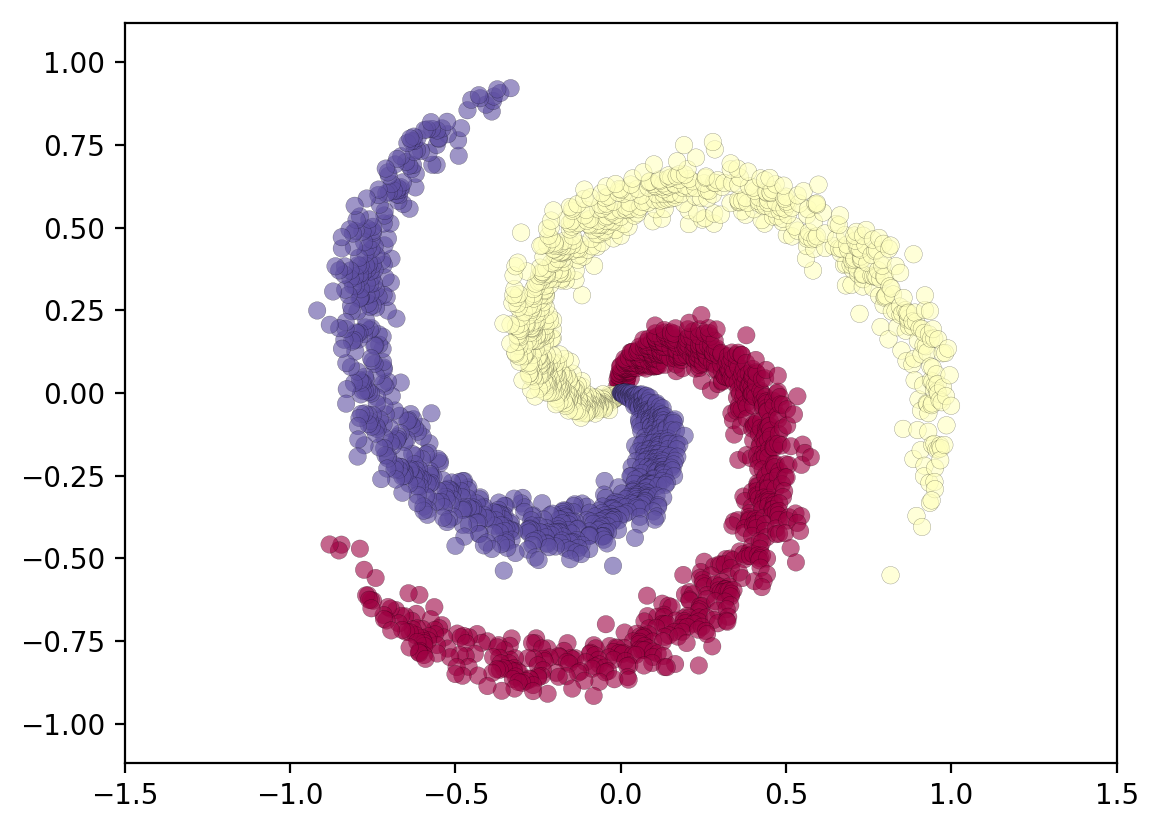

In [49]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#%matplotlib widget
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

np.random.seed(0)
N = 800 # number of points per class
D_in = 2   # dimensionality
D_out = 3   # number of classes
I = N*D_out # Total number of points
X_np = np.zeros((N*D_out,D_in))
y_np = np.zeros(N*D_out, dtype='uint8')
for j in range(D_out):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X_np[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_np[ix] = j
Y_np = np.atleast_2d(y_np).T.astype(float) # Vector made out of y, for convenience

plt.style.use('default')
fig = plt.figure()
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=40, cmap=plt.cm.Spectral, alpha=0.6
            , edgecolors='black', linewidths=0.1)
plt.axis('equal') ; plt.xlim([-1.5,1.5]) ; plt.ylim([-1.5,1.5]) ;

### A simplistic linear regression model


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [50]:
# data tensors
x = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np.reshape((X_np.shape[0], 1))).float()

In [60]:
# Design model with nn.Sequential
model = nn.Sequential(
    nn.Linear(D_in, 1),
)

In [52]:
# Define loss function
# we will use Mean Squared Error (MSE) as our loss function.
loss_fn = nn.MSELoss(reduction='mean')

In [61]:
# Training
time = []
cost = []
learning_rate = 1e-02
epochs = 201
for t in range(epochs):
    # Forward pass (compute the predicted y)
    y_pred = model(x)

    # Compute loss with loss_fn
    # loss = (0.5/I)*(y_pred - y).pow(2).sum()
    loss = loss_fn(y_pred, y)
    
    # Print the loss
    if t % 20 == 0:
        print("iteration %d: loss %f" % (t, loss))
    time.append(t)
    cost.append(loss)
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Use autograd to compute the backward pass 
    loss.backward()

    with torch.no_grad():
            # Update the parameters
            for param in model.parameters():
                param -= learning_rate * param.grad
  

iteration 0: loss 3.412107
iteration 20: loss 1.878640
iteration 40: loss 1.187091
iteration 60: loss 0.871453
iteration 80: loss 0.724100
iteration 100: loss 0.652474
iteration 120: loss 0.615267
iteration 140: loss 0.594004
iteration 160: loss 0.580386
iteration 180: loss 0.570656
iteration 200: loss 0.563082


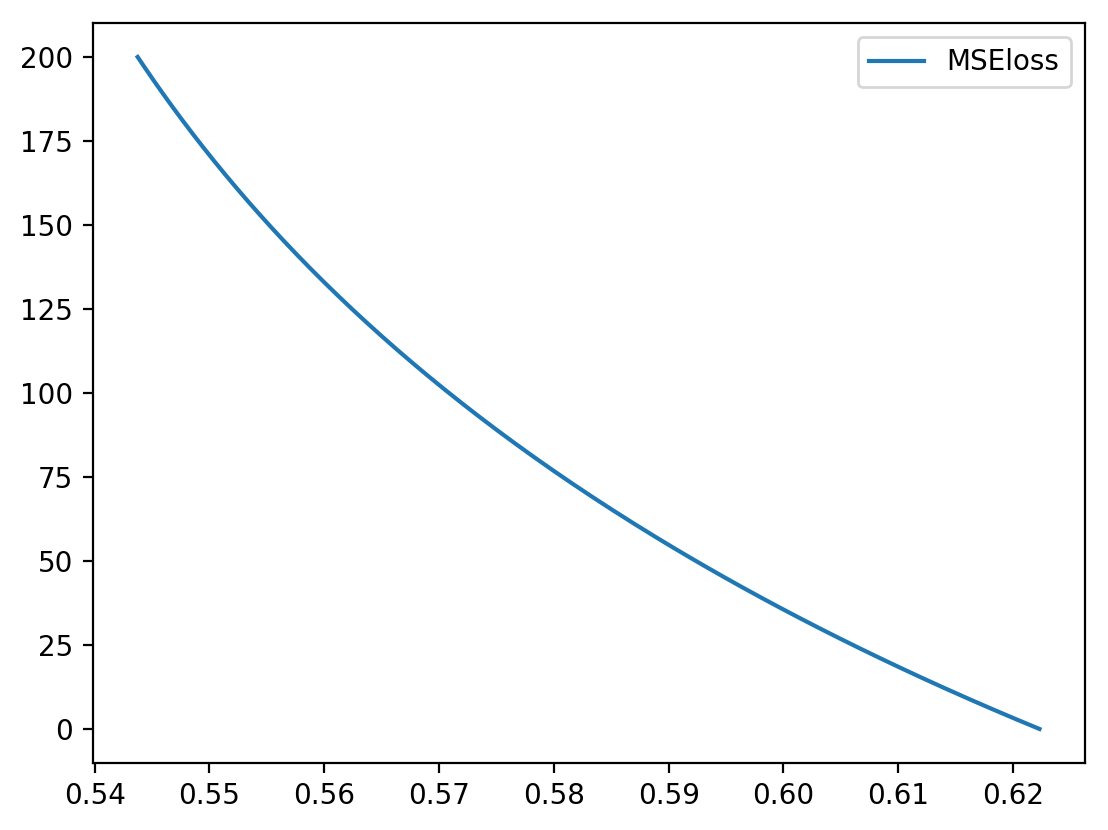

In [59]:
fig, ax = plt.subplots()
ax.plot(cost, time, label="MSEloss")
ax.legend();

In [62]:
# evaluate training set accuracy
scores = model(x).detach().numpy()
Y = y.numpy()
predicted_class = np.maximum(np.minimum(np.round(scores), 2), 0)
print('training accuracy: %.2f' % (np.mean(predicted_class == Y)))

training accuracy: 0.27


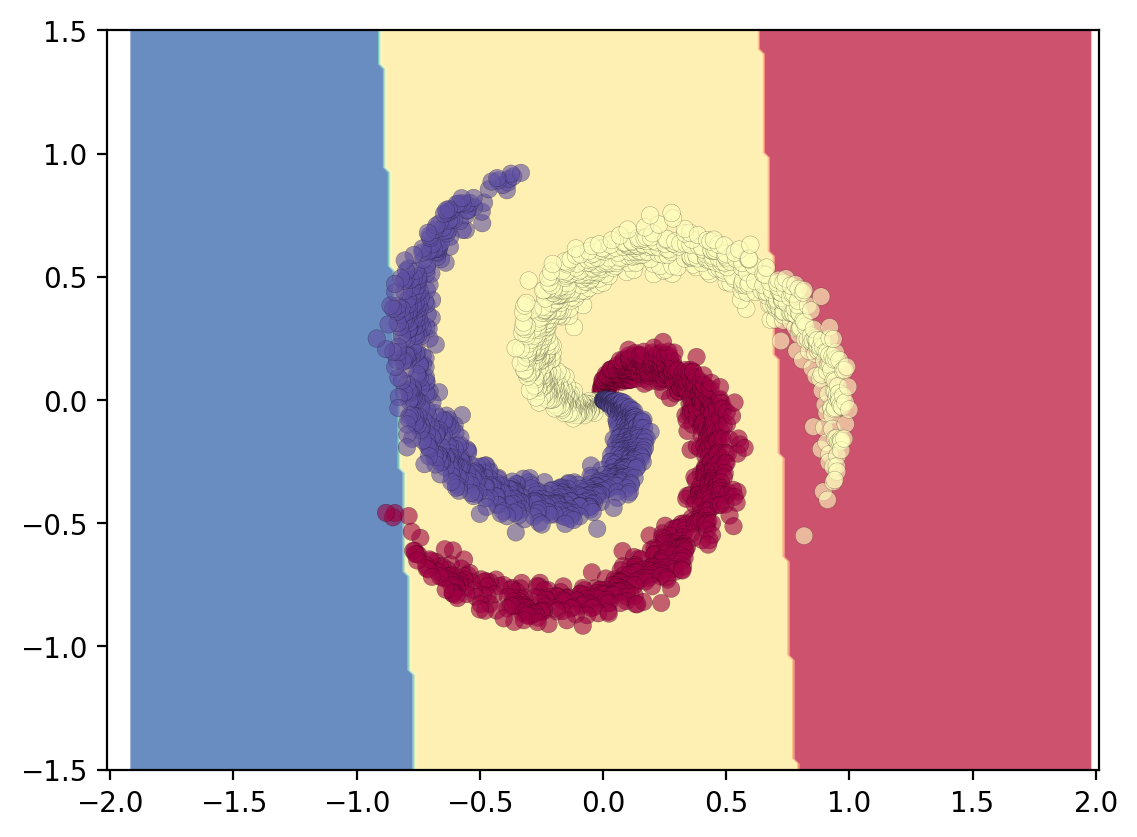

In [63]:
# plot the resulting classifier
W = model[0].weight.t().detach().numpy()
b = model[0].bias.detach().numpy()

h = 0.02
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.maximum(np.minimum(np.round(Z), 2), 0)
Z = Z.reshape(xx.shape)

%config InlineBackend.figure_format ='retina'
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8, antialiased= True)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=40, cmap=plt.cm.Spectral, alpha=0.6
            , edgecolors='black', linewidths=0.1)
plt.axis('equal') ; plt.xlim([-1.5,1.5]) ; plt.ylim([-1.5,1.5]) ;

### A fully-connected ReLU two-layer network

In [64]:
# data tensors
x = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np.reshape((X_np.shape[0], 1))).long()

In [65]:
# Design model with nn.Sequential
H = 100
model = nn.Sequential(
    nn.Linear(D_in, H),
    nn.ReLU(),
    nn.Linear(H, D_out),
)
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)

In [67]:
# Design the model by subclassing nn.Module
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred
model = TwoLayerNet(D_in, H, D_out)
model

TwoLayerNet(
  (linear1): Linear(in_features=2, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=3, bias=True)
)

In [68]:
# Define loss fonction
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

In [69]:
# Training
time = []
cost = []
learning_rate = 1e-0
epochs = 801
for t in range(epochs):
    
    # Forward pass (compute the predicted y)
    y_pred = model(x)
    
    # Compute loss
    y = y.squeeze_()
    loss   = loss_fn(y_pred, y)
    
    # print the loss
    if t % 200 == 0:
        print("iteration %d: loss %f" % (t, loss))
    time.append(t)
    cost.append(loss)
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Use autograd to compute the backward pass 
    loss.backward()

    with torch.no_grad():
            # Update the model parameters
            for param in model.parameters():
                param -= learning_rate * param.grad

iteration 0: loss 1.173017
iteration 200: loss 0.245753
iteration 400: loss 0.143166
iteration 600: loss 0.100086
iteration 800: loss 0.076941


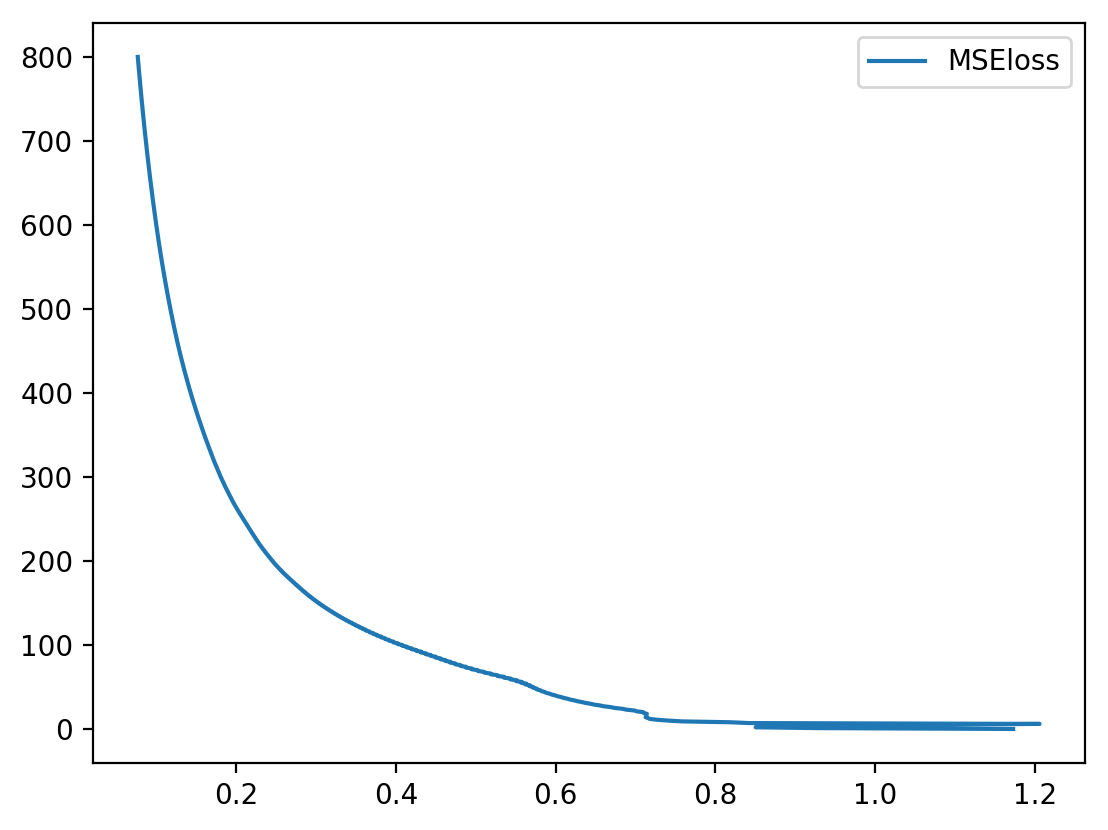

In [70]:
fig, ax = plt.subplots()
ax.plot(cost, time, label="MSEloss")
ax.legend();

In [71]:
# evaluate training set accuracy
scores = model(x).detach().numpy()
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y_np)))

training accuracy: 0.99


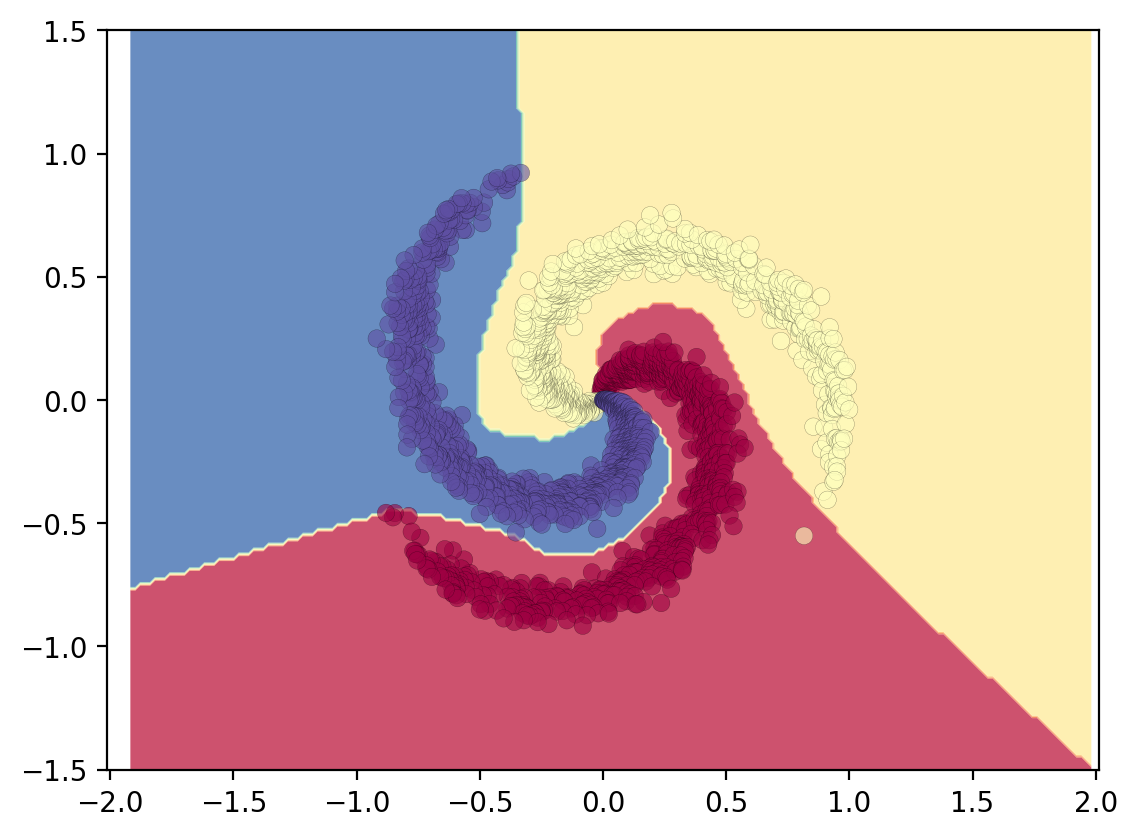

In [72]:
W1 = model.linear1.weight.t().detach().numpy()
b1 = model.linear1.bias.detach().numpy()
W2 = model.linear2.weight.t().detach().numpy()
b2 = model.linear2.bias.detach().numpy()

# plot the resulting classifier
h = 0.02
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8, antialiased= True)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=40, cmap=plt.cm.Spectral, alpha=0.6
            , edgecolors='black', linewidths=0.1)
plt.axis('equal') ; plt.xlim([-1.5,1.5]) ; plt.ylim([-1.5,1.5]) ;

## Define an Optimizer for updating weights of the model

- Use the optim package to define an Optimizer that will update the weights of the model for us.
- The optim package contains many other optimization algorithms : https://pytorch.org/docs/stable/optim.html
- The first argument to the Optimizer constructor tells the optimizer which Tensors it should update.

In [73]:
# data tensors
x = torch.from_numpy(X_np).float()
y = torch.from_numpy(y_np.reshape((X_np.shape[0], 1))).long()

In [80]:
# Design the model by subclassing nn.Module
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred
model = TwoLayerNet(D_in, H, D_out)
model

TwoLayerNet(
  (linear1): Linear(in_features=2, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=3, bias=True)
)

In [81]:
device = torch.device("cuda:0" if torch.cuda.is_available() 
                      else "cpu")
model.to(device)

TwoLayerNet(
  (linear1): Linear(in_features=2, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=3, bias=True)
)

In [82]:
# Define loss function as a loss criterion for the model
criterion = torch.nn.CrossEntropyLoss(reduction='mean')

In [83]:
# Define an Optimizer 
# Here we will use Adam
# The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
learning_rate = 1e-02
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [84]:
# Training
time = []
cost = []
epochs = 501
for t in range(epochs):

    # Forward pass (compute the predicted y)
    y_pred = model(x)
    
    # Compute loss
    y = y.squeeze_()
    loss = criterion(y_pred, y)
    
    # print the loss
    if t % 200 == 0:
        print("iteration %d: loss %f" % (t, loss))
    time.append(t)
    cost.append(loss)
    
    # Zero the gradients before running the backward
    # model.zero_grad()
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()
    
    # Update the parameters of the model calling the step function on the Optimizer
    # with torch.no_grad():
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    optimizer.step()

iteration 0: loss 1.130136
iteration 200: loss 0.076217
iteration 400: loss 0.034803


training accuracy: 0.22


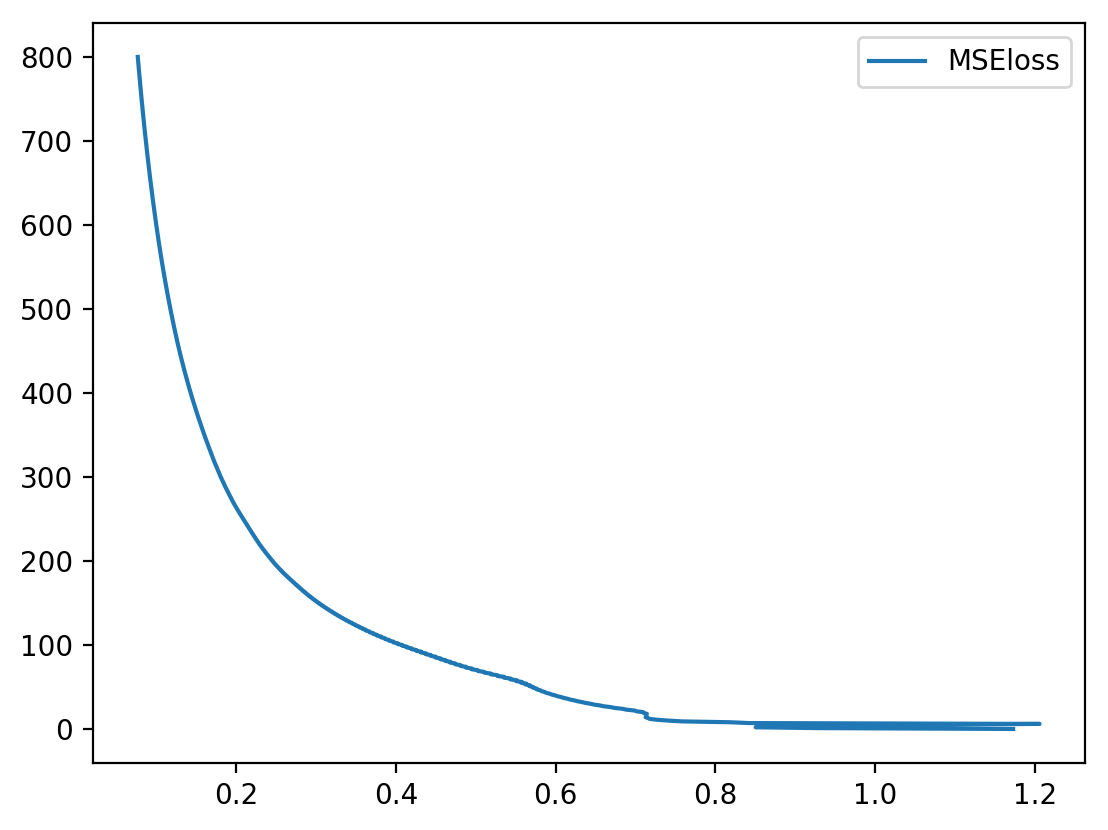

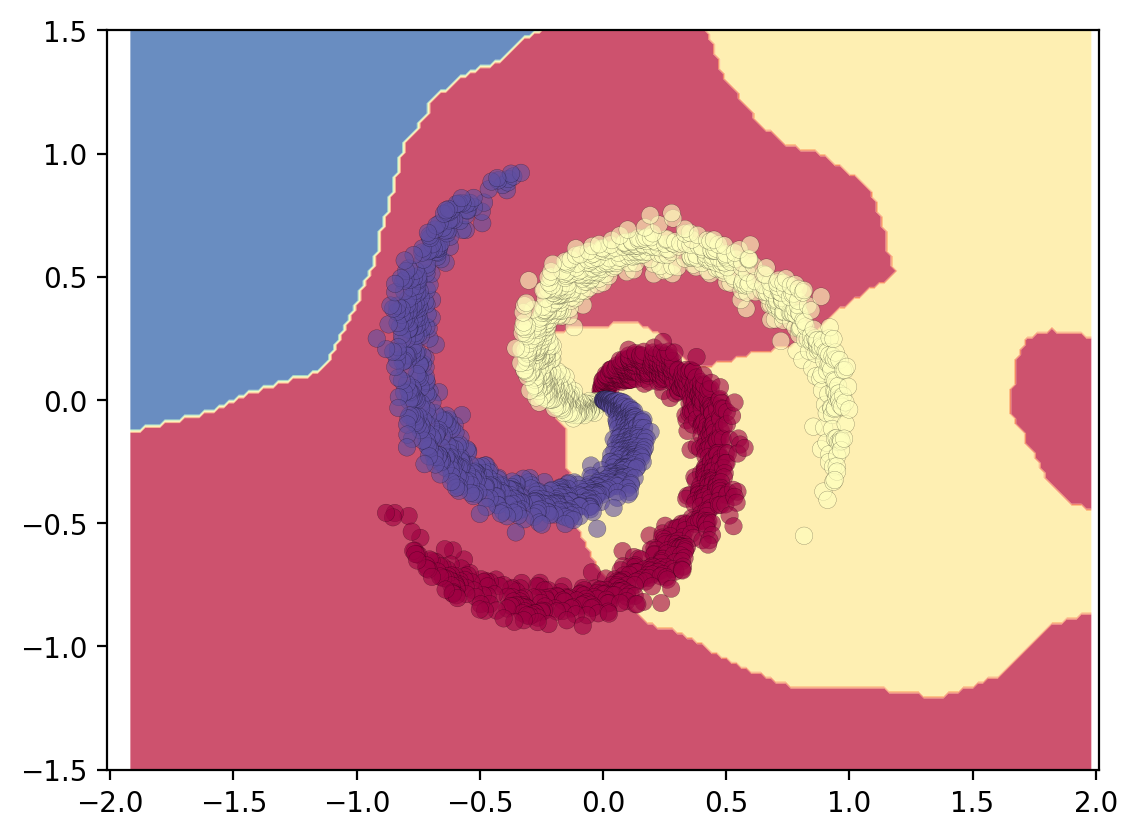

In [78]:
fig, ax = plt.subplots()
ax.plot(cost, time, label="MSEloss")
ax.legend();

# evaluate training set accuracy
scores = model(x).detach().numpy()
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y_np)))

W1 = model.linear1.weight.t().detach().numpy()
b1 = model.linear1.bias.detach().numpy()
W2 = model.linear2.weight.t().detach().numpy()
b2 = model.linear2.bias.detach().numpy()

# plot the resulting classifier
h = 0.02
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8, antialiased= True)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, s=40, cmap=plt.cm.Spectral, alpha=0.6
            , edgecolors='black', linewidths=0.1)
plt.axis('equal') ; plt.xlim([-1.5,1.5]) ; plt.ylim([-1.5,1.5]) ;

## Recap - what we learned so far
- Design a model with nn package
- Define a loss function with nn package
- Define an Optimizer for updating model parameters with optim package
- Train the model in a training loop